## Dataset description

This assignment must be conducted by using the `CarPrice_Assignment.csv` dataset. It is a single CSV (Comma Separated Values) file that contains prices for 205 car models (samples). The CSV file has been uploaded to the e-learning platform along with this notebook.

The dataset contains 26 columns. The first column is `car_ID` and contains a unique car identifier. The last column contains the price of the model. The rest 24 columns represent other features which can be either numerical, or categorical.


## Task 1: Processing the dataset




### 1.1 Replace the column `CarName` by `CompanyName`.


 * if `CarName='alfa-romero giulia'`, then `CompanyName='alfa-romero'`
 * if `CarName='audi 100ls'`, then `CompanyName='audi'`


In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data file
data = pd.read_csv("CarPrice.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Replacing the column CarName by CompanyName
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1.2 Drop the `car_ID` column

After this process, the dataset must consist of 205 rows and 25 columns (24 features + 1 target variable).


In [5]:
# Drop the car_ID column
data = data.drop('car_ID', axis=1)

#del data['car_ID']
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.shape

(205, 25)

# Check & fixing of misspellings

In [7]:
# Check for potential inconsistencies in CompanyName, otherwise our subsequent results and analysis will be flawed
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
# Fixing misspellings CompanyName.
data.CompanyName.replace('maxda','mazda',inplace=True)
data.CompanyName.replace('Nissan','nissan',inplace=True)
data.CompanyName.replace('porcshce','porsche',inplace=True)
data.CompanyName.replace('toyouta','toyota',inplace=True)
data.CompanyName.replace('vokswagen','volkswagen',inplace=True)
data.CompanyName.replace('vw','volkswagen',inplace=True)

In [9]:
# Checking for the correct implementation of fixing.
data.shape
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Task 2: Feature engineering

The dataset contains both numerical and categorical features. There are five sub-tasks in this task. More specifically:


### 2.1. Dataset statistics

Report the minimum, maximum, and mean values for each numerical feature.


In [10]:
# Dataset statistics
data.describe().loc[["min","max","mean"],:]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.00000,5118.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.00000,45400.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.75122,13276.710571


### 2.2. How many missing values do we have per column?

Count the number of rows that have missing values per column.

In [11]:
# Missing values per column.
print(data.isnull().sum())

symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


There is no missing values in our dataset.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CompanyName       205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### 2.3. Correlation with the target variables (visual)

Study the correlation of each of the 24 features with the target variable (car price)

# Correlation of numerical features  with the target variable - price (visual)

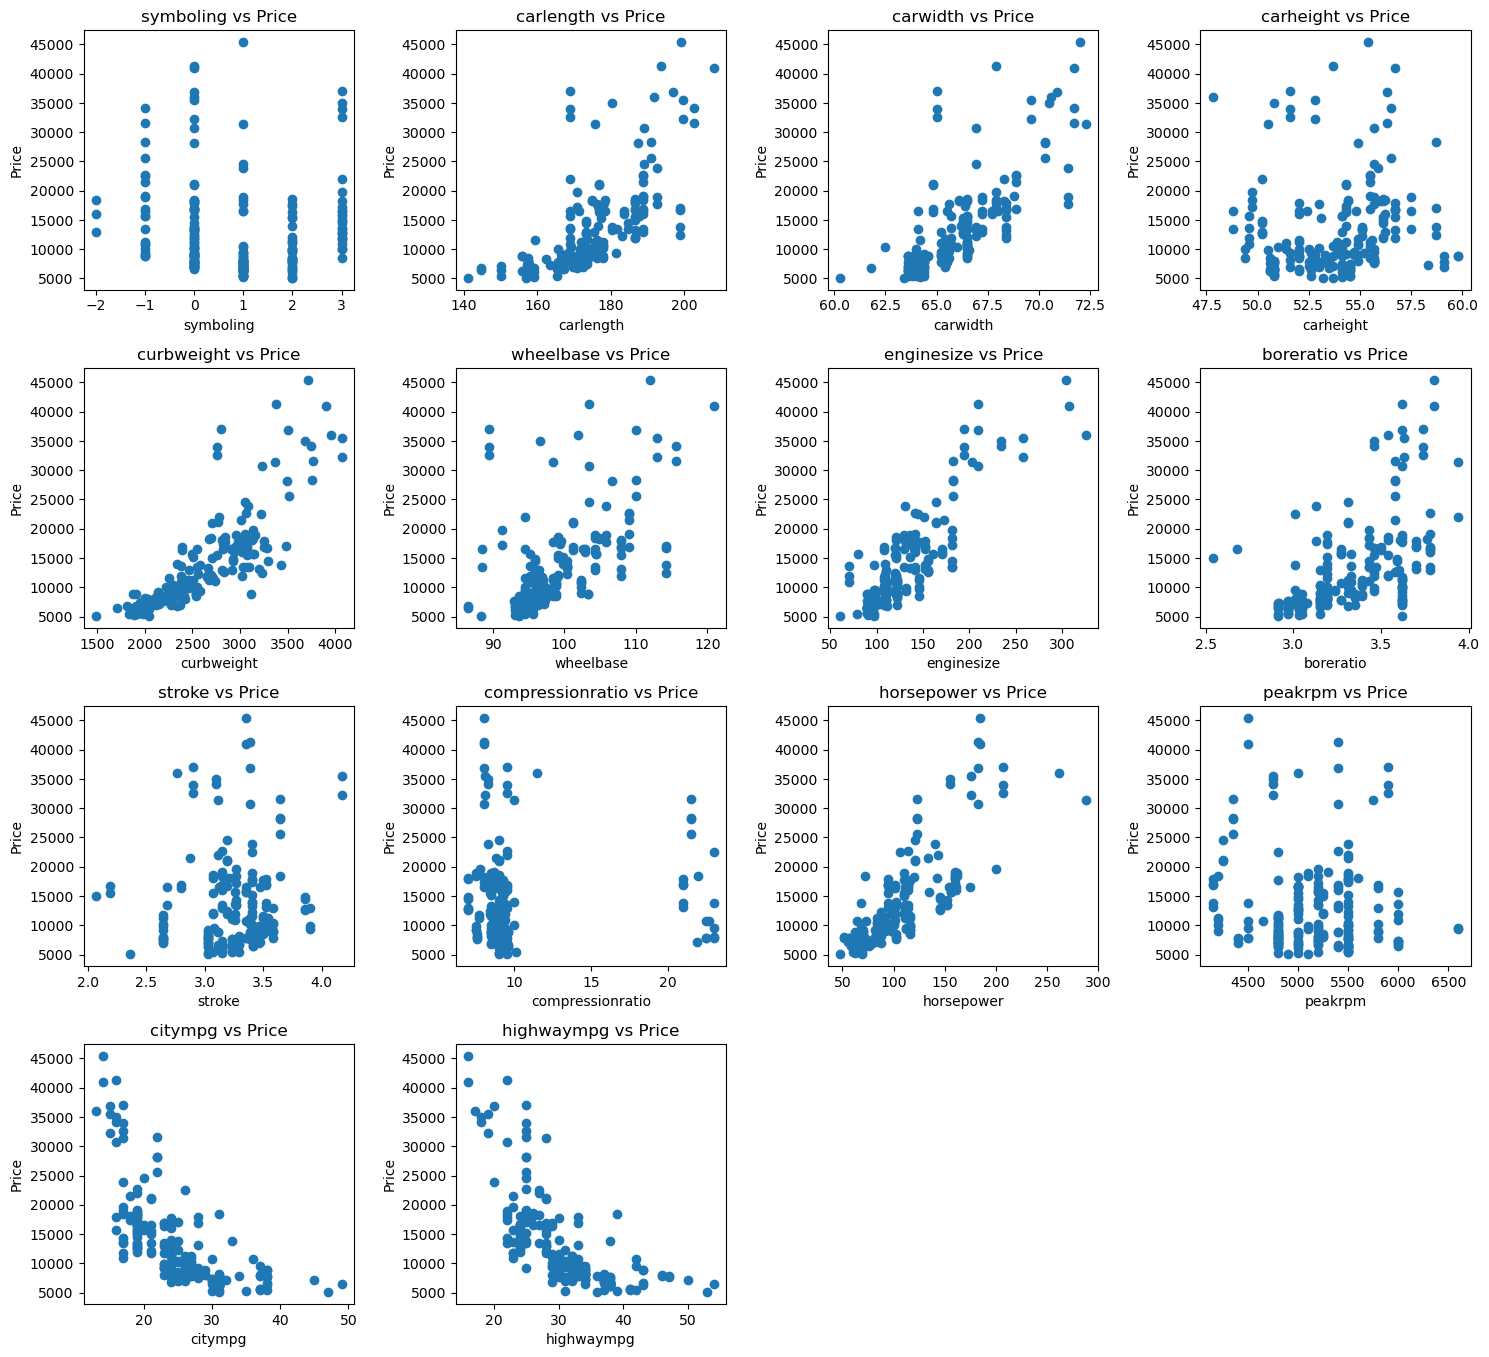

In [13]:
#  creating a scatter plot for each feature in the list "features_to_plot" against the target variable "price".

def scatter(x):
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

features_to_plot = ['symboling', 'carlength', 'carwidth', 'carheight', 'curbweight', 'wheelbase', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

plt.figure(figsize=(15,20))
for i, feature in enumerate(features_to_plot):
    plt.subplot(6, 4, i+1)
    scatter(feature)
plt.tight_layout()


Conclusion for Numerical Values:

1. Inceasing the values of the following features the price of the car increases: carlength, carwidth, curbweight, weelbase, enginesize, boreratio, horsepower.

2. Inceasing the values of the following features the price of the car decreases: citympg, highwaympg.

3. Inceasing the values of the following features the price of the car affected randomly: peakrpm, stroke, carheight

# Correlation of categorical features  with the target variable - price (visual)

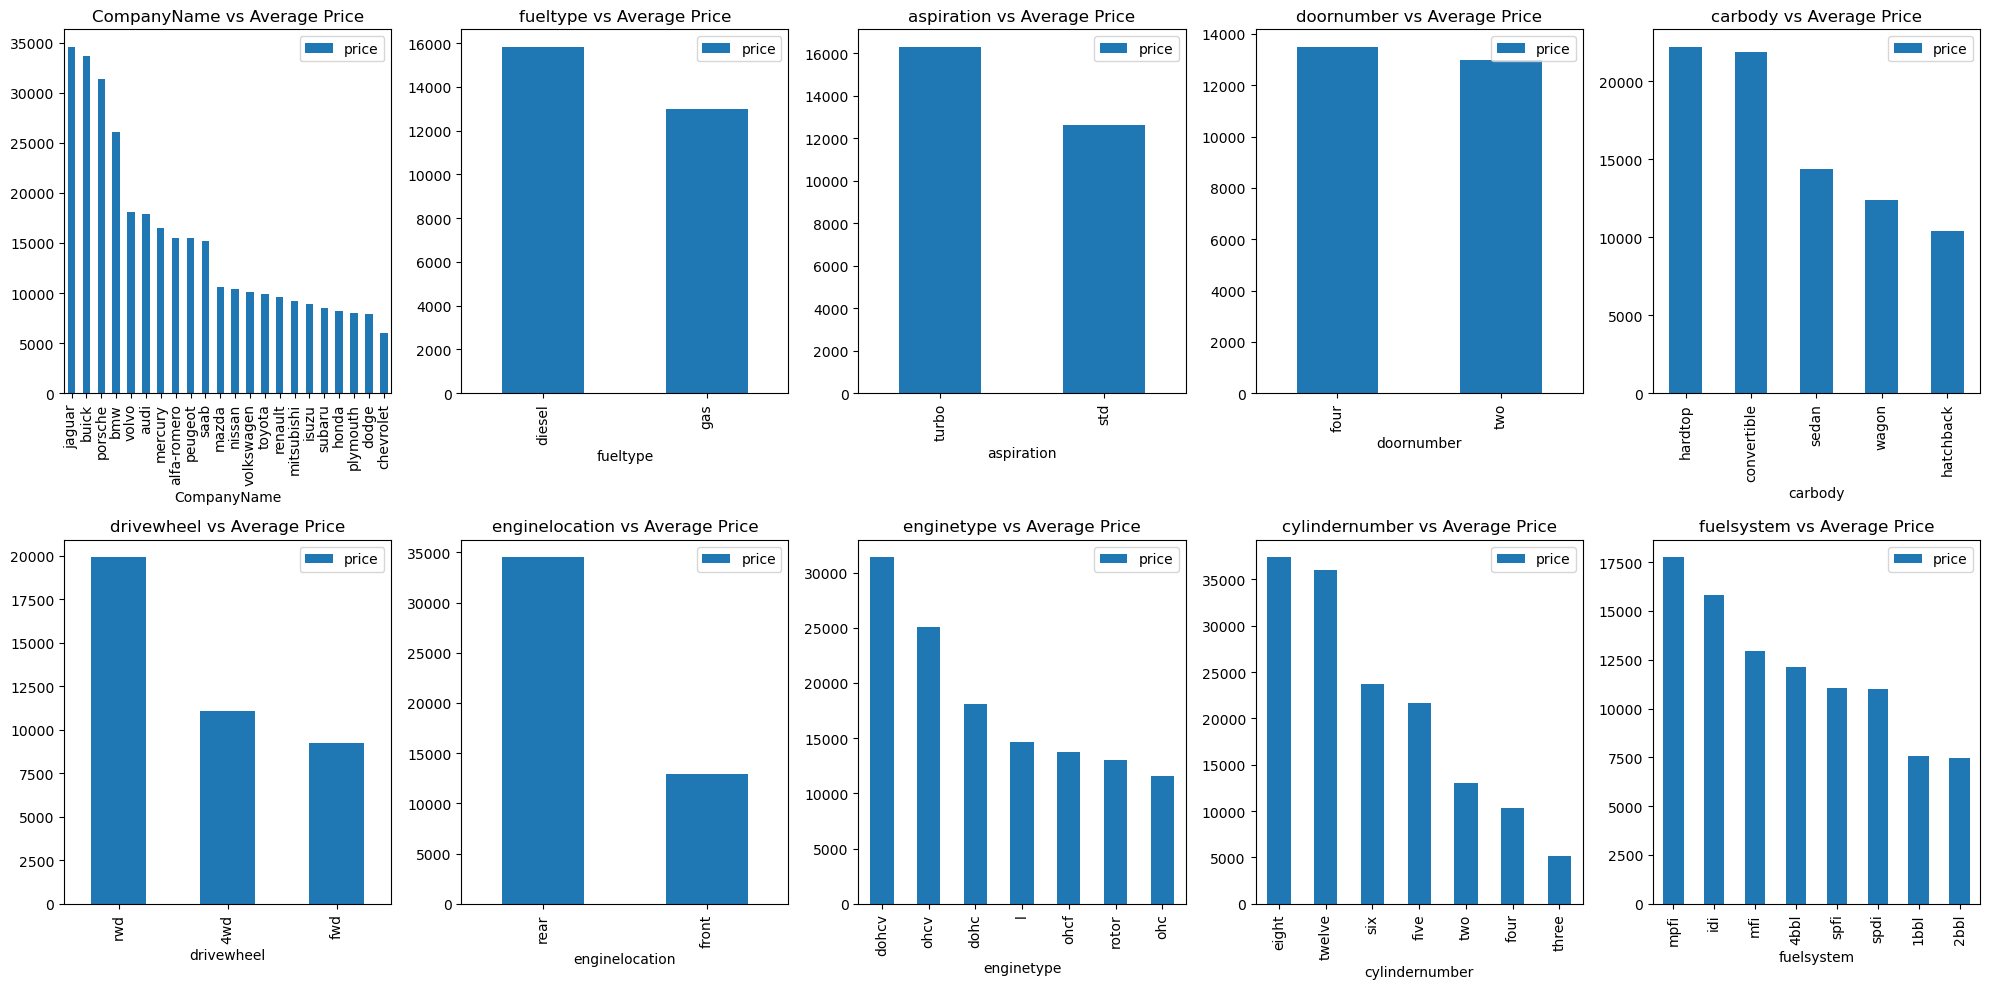

In [14]:
#  Bar chart for each feature in the list "features" to compare the average price of the target variable "price" for each category of the feature.
import matplotlib.pyplot as plt
features = ['CompanyName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

# Set the number of rows and columns for the subplot
n_rows = 2
n_cols = 5

# Create the subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,10))

# Iterate over the features and plot the subplot for each feature
for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    df = pd.DataFrame(data.groupby([feature])['price'].mean().sort_values(ascending=False))
    df.plot.bar(ax=axs[row, col])
    axs[row, col].set_title(feature + ' vs Average Price')

# Show the plot
plt.tight_layout()



Conclusion for categorical:

In categorical data, we cam also observe variation of price with regard to attribute, however we can not assign any monotony here with only exception to the number of cylinders, where the more cylinders the higher the price.

In [15]:
data_cat = data.select_dtypes(exclude='number')
data_cat

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [16]:
data

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### 2.4 Managing the categorical features

The existence of categorical features creates several problems, as the majority of data engineering and machine learning algorithms work only with numerical data. We can either drop the categorical features, or convert them to numerical ones. 
Here are the two required actions:

* Drop the `CompanyName` feature, and
* Convert the categorical features to numerical by applying one-hot-encoding. As mentioned in the class, in one-hot-encoding the first value of each encoded feature is not required. So to reduce dimensionality, remove this first value from each one-hot-encoded feature.

  **Hint:** If you are managing the data with Pandas dataframes, use the `get_dummies` method with `drop_first=True`.

After this process, the shape of the dataset must be 205 rows $\times$ 44 columns.


In [17]:
# Managing the categorical features.
data_no_comp_name = data.drop('CompanyName', axis=1)
data_no_comp_name

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Applying one-hot-encoding

In [18]:
# Employing one-hot-encoding for categorical data.
data_ht_en = pd.get_dummies(data_no_comp_name, drop_first = True)
data_ht_en

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


### 2.5 Correlation with the target variables (numerical)

This is an important process, as it indicates the features that are strongly correlated to the target variable. There are several ways of estimating this correlation.

* Compute the Pearson coefficient that quantifies the pairwise correlations of the dataset columns (including the target variable).

# Correlation matrix

In [19]:
# Pairwise correlation matrix
data_corr = data_ht_en.corr()
data_corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,...,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,...,-0.111081,0.335555,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,...,-0.108774,0.054482,0.000127,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,...,-0.050450,-0.110878,-0.000187,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,...,-0.011354,0.023986,-0.026436,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654


* Identify the 8 features that have the strongest correlation with the target variable.

#  8 features that have the strongest correlation with the target variable

In [20]:
# select the top 8 features that have the highest correlation with the target variable "price".
data_corr_srtd = data_corr['price'].sort_values(ascending = False)
ft_8 = data_corr_srtd[1:9]
ft_8


enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
carlength         0.682920
drivewheel_rwd    0.638957
wheelbase         0.577816
boreratio         0.553173
Name: price, dtype: float64

* Create a heatmap of the pairwise feature correlations like the following one.

**Hint:** use the `seaborn` library.


# Heatmap 

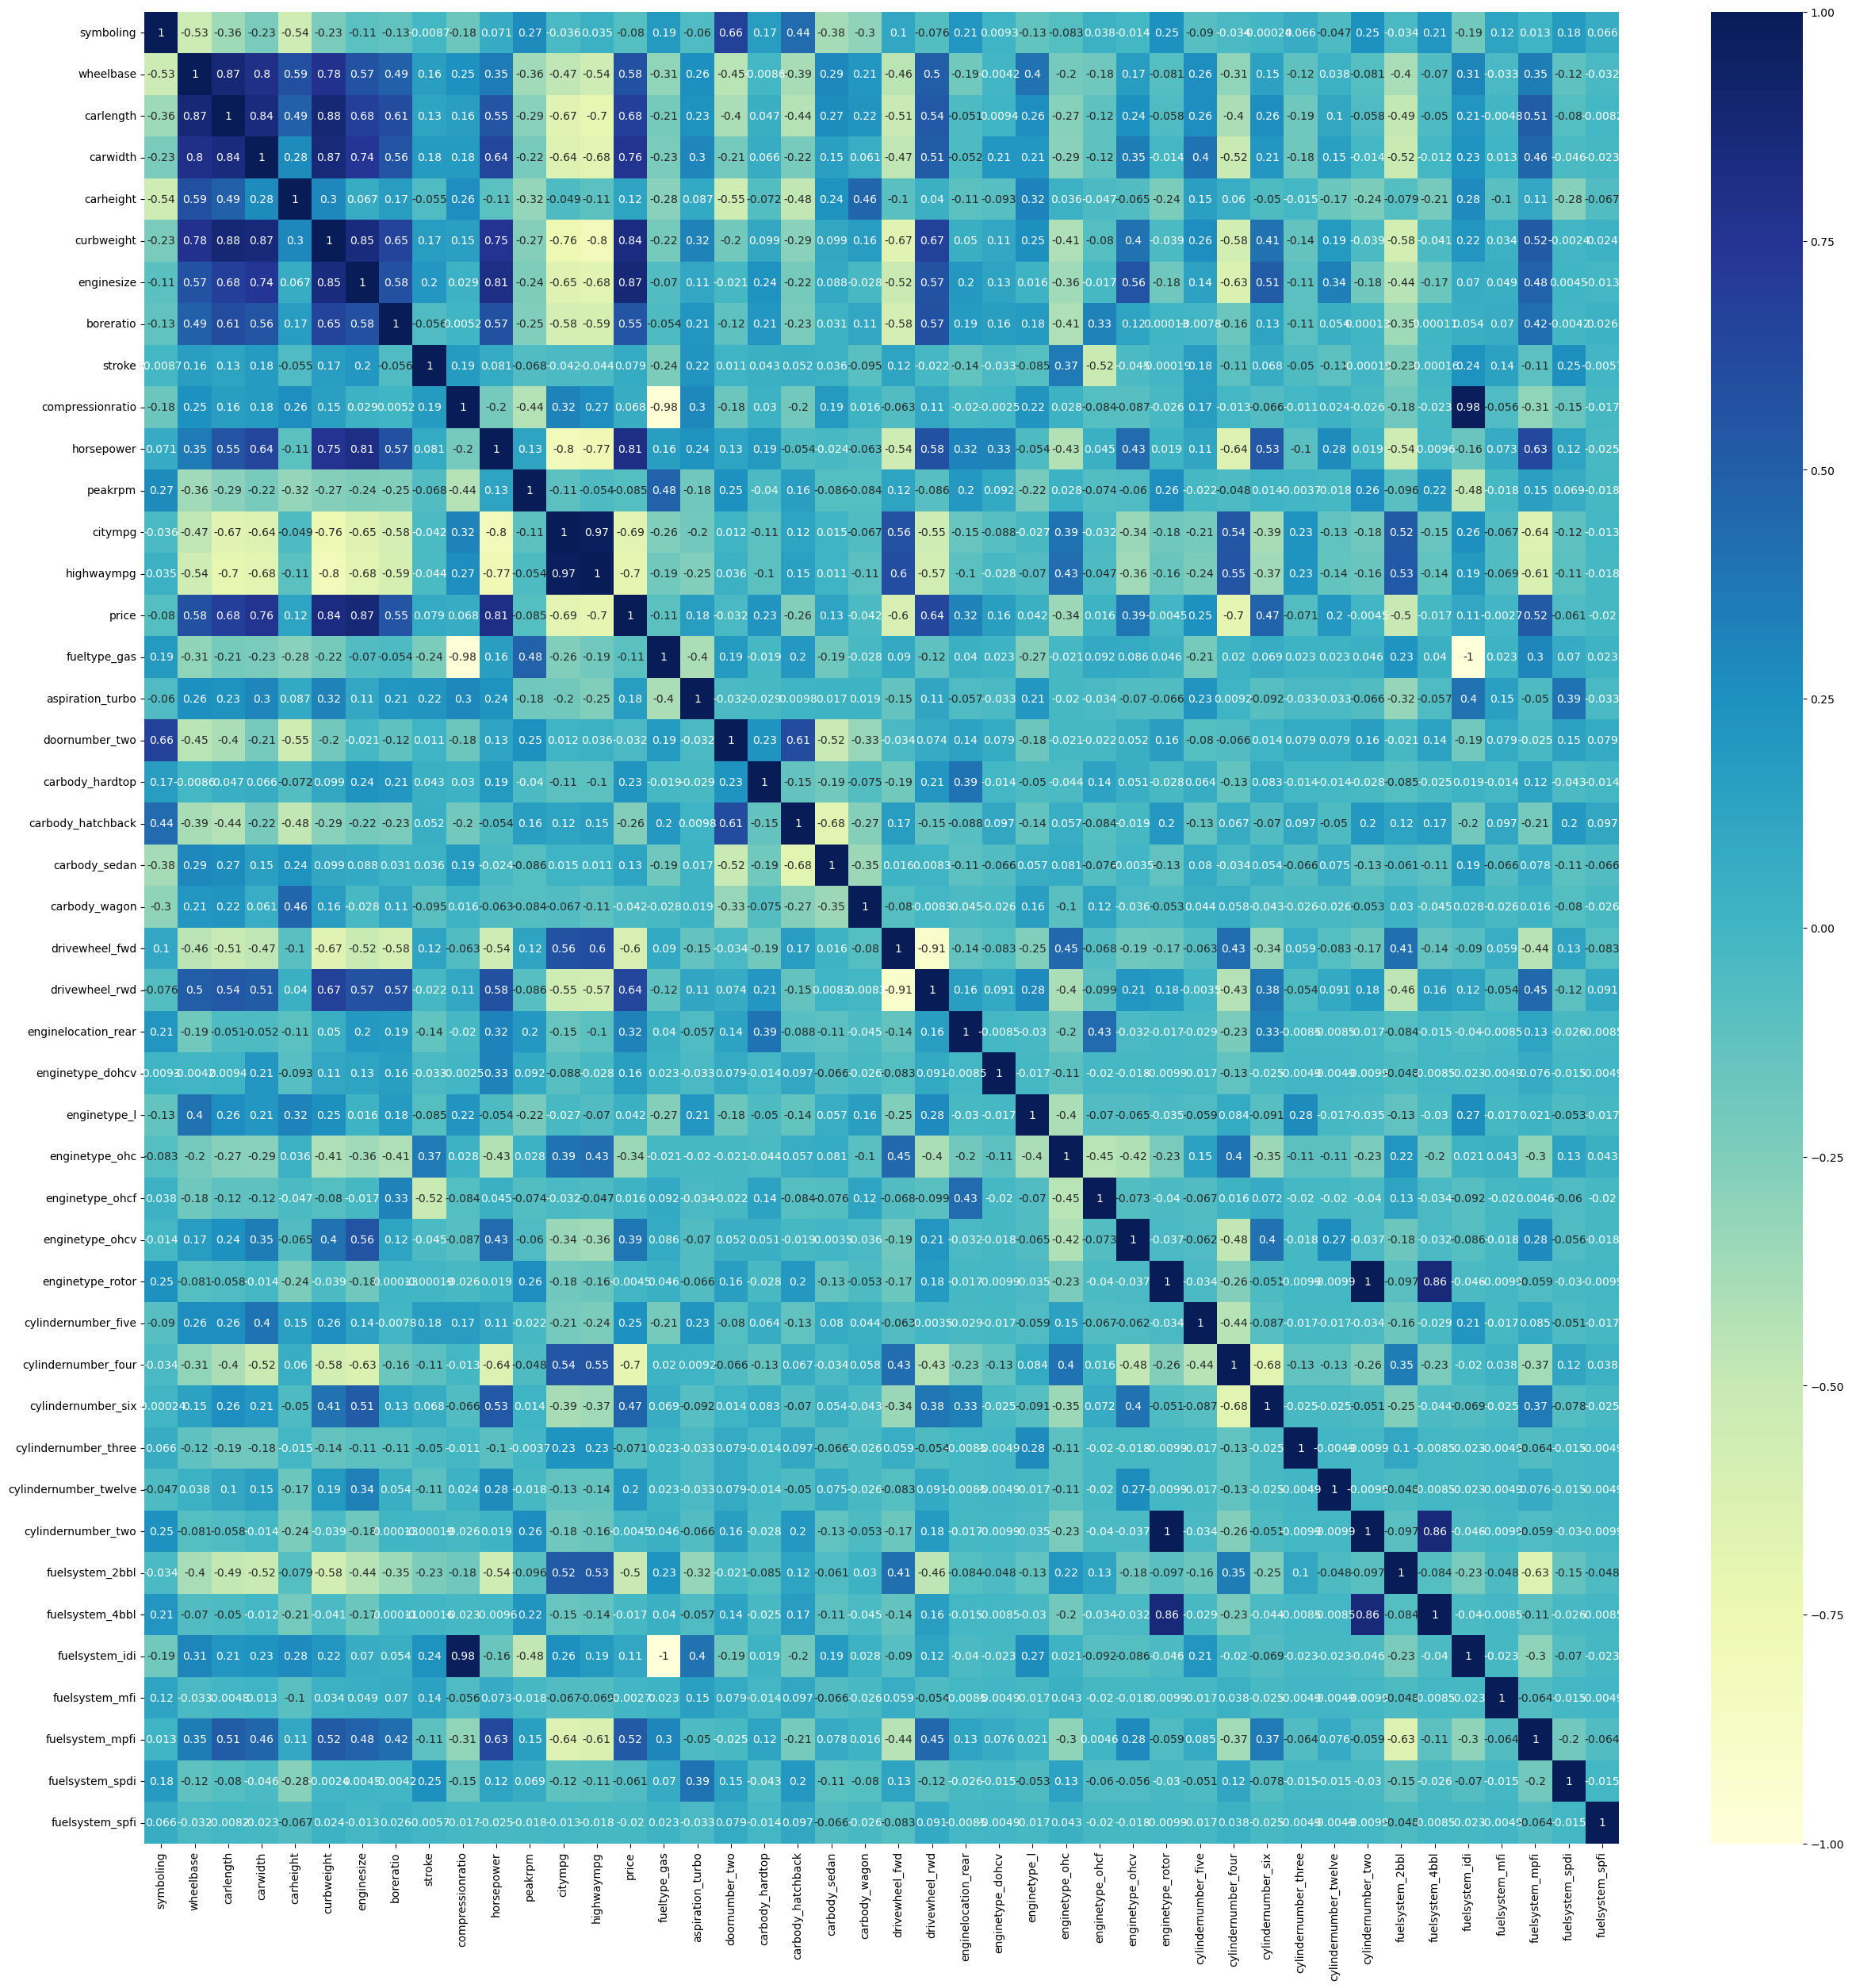

In [21]:
# Correlation using heatmap
plt.figure(figsize = (30,30))
sns.heatmap(data_ht_en.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [22]:
data['CompanyName'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

# Task 3: Create a model to predict car prices

This is a typical Regression problem. You will experiment with the following scikit-learn algorithms:
* `LinearRegression`: Ordinary Least Squares Linear Regression.
* `Ridge`: Linear least squares with L2 regularization.
* `Lasso`: Linear Model trained with L1 prior as regularizer (aka the Lasso).
* `DecisionTreeRegressor`: Decision Tree for Regression problems.
* `RandomForestRegressor`: Random Forest for Regression problems.
* `MLPRegressor`: Multilayer Perceptron (feed-forward neural networks) for Regression problems.

Use 70% of the dataset for training and the rest 30% for testing.


In [23]:
# importing the libraries for the models.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn import metrics 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

In [24]:
# Splitting data to x and target y

# Assigning features to X
X = data_ht_en.loc[:, data_ht_en.columns!='price']

# Assigning targe to Y
Y = data_ht_en['price']


In [25]:
# Splitting data into train and test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

Employment of Gridsearch through model, in order to get a first feeling of the "good" hyperparameters and accordingly to experiment in order to come up with the final choice

In [26]:
# Searching for indicative "best" set of parameters through all models but MLP. For MLP only manually search we applied.
models = {'Linear Regression': LinearRegression(),
          'Ridge Regression': Ridge(random_state = 42),
          'Lasso Regression': Lasso(random_state = 42),
          'Decision Tree Regression': DecisionTreeRegressor(random_state = 42),
          'Random Forest Regression': RandomForestRegressor(random_state = 42)}

param_grids = {'Linear Regression': {'fit_intercept':[True]},
               'Ridge Regression': {'alpha':[0.1, 1, 10], 'fit_intercept':[True]},
               'Lasso Regression': {'alpha':[0.1, 1, 10], 'fit_intercept':[True]},
               'Decision Tree Regression': {'max_depth':[2,4,6,8,10],'min_samples_split': [2, 4, 6]},
               'Random Forest Regression': {'n_estimators':[10,50,100,200], 'max_depth':[2,4,6,8,10]}}
# Printing the "best" parameters for each model
for name, model in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, Y_train)
    print(name + ": " + str(grid_search.best_params_))

Linear Regression: {'fit_intercept': True}
Ridge Regression: {'alpha': 1, 'fit_intercept': True}


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e+08, tolerance: 7.482e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+08, tolerance: 7.672e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.713e+08, tolerance: 

Lasso Regression: {'alpha': 10, 'fit_intercept': True}
Decision Tree Regression: {'max_depth': 10, 'min_samples_split': 6}
Random Forest Regression: {'max_depth': 10, 'n_estimators': 200}


In [27]:
# Random State seed
random_st = 42

# Ridge Regression hyperparameters
alpha_R = 0.6

# Lasso Regression hyperparameters
alpha_L = 5


# Decision Tree Regression hyperparameters
max_depth_DT = 8
min_sam_split = 3

# Random Forest Regression hyperparameters
max_depth_RF = 10
n_est = 200

# Multilayer Perceptron Regression hyperparameters of choice after long experimentation
l_rate = 'constant'
max_itr = 16000
alpha_MLP = 0.001
h_l_s = (100,)
tol_ = 0.0001
act_fun = 'relu'
solvr = 'adam'
l_rate_init = 0.001

In [28]:
# create a dictionary to store the models and their names
models = {'Linear Regression': LinearRegression(),
          'Ridge Regression': Ridge(alpha=alpha_R, random_state = random_st),
          'Lasso Regression': Lasso(alpha=alpha_L, random_state = random_st),
          'Decision Tree Regression': DecisionTreeRegressor( max_depth = max_depth_DT, random_state = random_st, min_samples_split = min_sam_split),
          'Random Forest Regression': RandomForestRegressor(random_state = random_st, max_depth = max_depth_RF, n_estimators = n_est),
          'Multi-Layer Perceptron Regression': MLPRegressor(learning_rate_init = l_rate_init, tol = tol_, hidden_layer_sizes = h_l_s, random_state = random_st, max_iter = max_itr, activation = act_fun, alpha = alpha_MLP, learning_rate = l_rate, solver = solvr)}

# create a dictionary to store the evaluation metric scores for each model
scores = {}

# loop through the models
for name, model in models.items():
  # fit the model to the training data
  model.fit(X_train, Y_train)
  
  # make predictions on the test data
  predictions = model.predict(X_test)
  
  # compute the MSE, MAE, and R-square scores for the model
  scores[name] = {'MSE': mean_squared_error(Y_test, predictions),
                  'MAE': mean_absolute_error(Y_test, predictions),
                  'R-square': model.score(X_test, Y_test)}

# create a dictionary for the dataframe
dat = {
    "Classifier": ["Linear Regression", "Ridge Regression","Lasso Regression", "Decision Tree", "Random Forest","Multilayer Perceptron Regressor"],
    "MSE": [scores[name]["MSE"] for name in scores],
    "MAE": [scores[name]["MAE"] for name in scores],
    "R2": [scores[name]["R-square"] for name in scores]
}

# create a dataframe from the dictionary
df = pd.DataFrame.from_dict(dat)

# print the dataframe
df



,Classifier,MSE,MAE,R2
0,Linear Regression,7.052033e+06,1889.805133,0.898216
1,Ridge Regression,9.822677e+06,2150.105523,0.858227
2,Lasso Regression,8.307080e+06,1998.761195,0.880102
3,Decision Tree,7.829650e+06,1830.711477,0.886993
4,Random Forest,3.857550e+06,1368.475633,0.944323
5,Multilayer Perceptron Regressor,9.130605e+06,1989.476472,0.868216


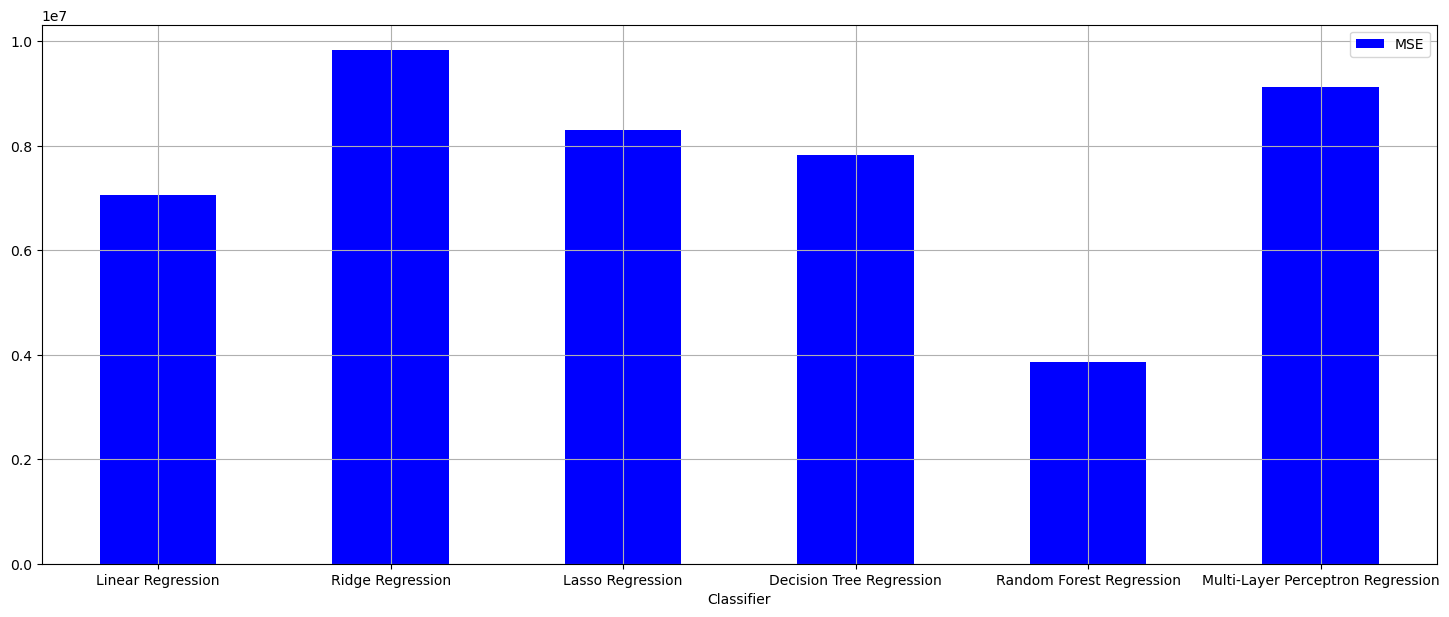

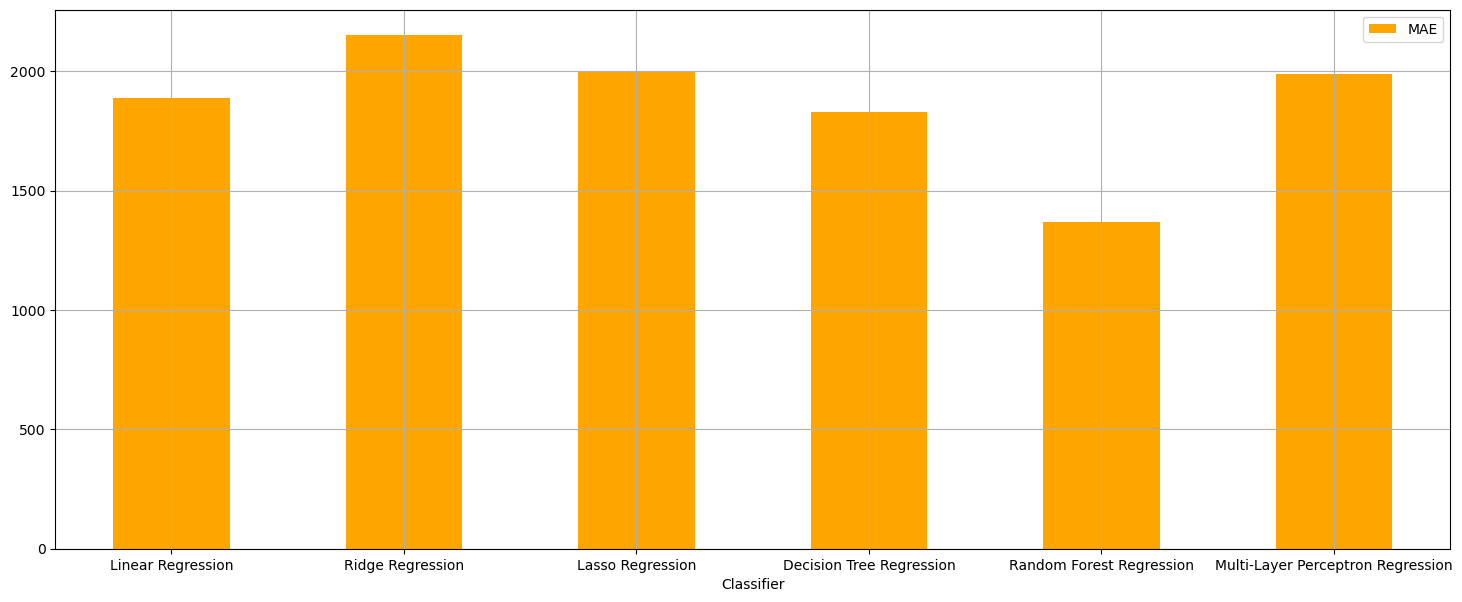

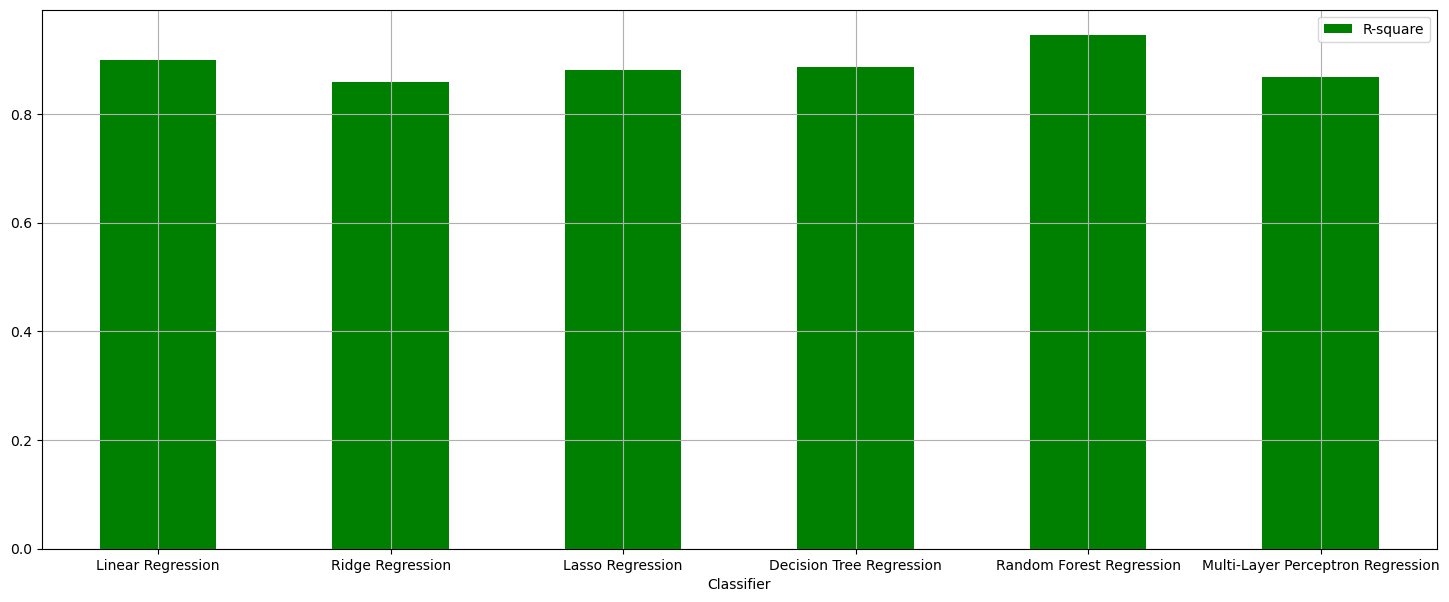

In [29]:
# create a list of metrics to loop through
metrics = ['MSE', 'MAE', 'R-square']

# loop through the metrics
for metric in metrics:
  # create a dataframe from the scores dictionary
  df = pd.DataFrame({'Classifier': list(scores.keys()), metric: [scores[name][metric] for name in scores]})

  # create a bar plot
  fig, ax = plt.subplots(figsize=(18,7))
  ax = df.plot.bar(x='Classifier', y=metric, rot=0, color = ["blue", "orange", "green"][metrics.index(metric)], grid = True, ax=ax)


Train the models by studying the effect of various hyper-parameters. Create a comparative table of Mean Squared Error, Mean Absolute Error, and R2 score for each algorithm. You must also present the results using bar plots (see the examples below).

**Note:** You will report only the best-performing results for each model. However, you must mention which settings you tried.

For example: <em>"We tried Decision Tree Regressor with max_depth=2, 3, 4, 5,... and we got the best results for max_depth=4. The results are..."</em>



# Task 4: Standardization

Standardize the data and repeat all the experiments **by using the same hyper-parameters for the models**. Again, report the values of Mean Squared Error, Mean Absolute Error, and R2 score.

Compare the performance of the models and discuss your conclusions. How do the models compare when they operate on standardized and non-standardized data?

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# Stardardization of all features including categorical - one hot encoded

In [31]:
# fitting the scaler to the training data 
X_train_std =  scaler.fit_transform(X_train)

In [32]:
# fitting the scaler to the test data 
X_test_std = scaler.transform(X_test)

In [33]:
X.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [34]:
# Standardizing train set

X_train_std_ = pd.DataFrame(X_train_std, columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'] )
X_train_std_

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.5000,0.573309,0.076413,0.235105,0.043859,-0.221382,-0.121429,-0.038909,0.921956,-0.344056,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918
1,0.1250,0.622875,0.302880,0.924984,0.408026,0.646950,0.314497,1.692945,-0.448994,-0.531628,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918
2,-1.5000,0.573309,0.076413,0.235105,0.448489,-0.179118,-0.412047,-0.186301,0.301764,3.353784,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,3.304038,0.0,-0.993031,-0.209274,-0.083918
3,0.9375,-2.037199,-2.430901,-0.960684,-1.210497,-1.448956,-0.847973,-1.512828,0.497614,-0.210076,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,-0.993031,-0.209274,-0.083918
4,-0.6875,0.375042,0.173470,-0.546757,0.205711,0.262732,0.895732,-0.038909,-0.220503,-0.263668,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.1250,0.044598,0.310968,0.878992,-1.655591,1.086878,1.307440,0.403266,0.040631,-0.263668,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918
139,0.1250,0.755053,1.160219,0.419073,0.772194,0.925507,0.895732,-0.038909,-0.220503,-0.263668,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918
140,0.1250,-0.731945,-0.756662,-1.006675,0.286637,-1.220347,-0.726882,-0.628477,0.105914,-0.156485,...,0.0,-0.083918,-0.119098,1.524986,-0.083918,-0.302660,0.0,-0.993031,-0.209274,-0.083918
141,1.7500,0.655920,0.715373,0.787008,-0.724940,0.850585,1.065259,-0.186301,0.301764,-0.183280,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918


In [35]:
# Standardizing test set

X_test_std_ = pd.DataFrame(X_test_std, columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'] )
X_test_std_

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-0.6875,0.755053,1.160219,0.419073,0.772194,1.261697,1.985547,1.103378,0.432331,-0.531628,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918
1,-0.6875,0.094165,0.286704,0.878992,-0.724940,0.921665,0.096534,-0.702173,0.464973,-0.799587,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918
2,-0.6875,-0.285846,-0.101526,-0.362789,0.367563,-0.521071,-0.169866,0.034787,0.693464,-0.397648,...,0.0,-0.083918,-0.119098,1.524986,-0.083918,-0.302660,0.0,-0.993031,-0.209274,-0.083918
3,1.7500,0.028076,0.966105,0.235105,0.934046,0.162836,-0.145647,0.808594,-0.612203,-0.180601,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918
4,-1.5000,1.828996,1.313893,1.982797,1.986087,2.260663,1.355876,0.955986,1.248373,3.085824,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,3.304038,0.0,-0.993031,-0.209274,-0.083918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.7500,-0.599767,-0.457402,-0.132830,-1.696054,-0.371227,-1.380772,0.034787,-0.008332,-0.156485,...,0.0,-0.083918,8.396428,-0.655744,11.916375,-0.302660,0.0,-0.993031,-0.209274,-0.083918
58,1.7500,-1.558055,-0.465490,-0.454773,-0.886792,0.435630,1.622276,1.545553,-1.167111,-0.129689,...,0.0,-0.083918,-0.119098,-0.655744,-0.083918,-0.302660,0.0,1.007018,-0.209274,-0.083918
59,0.9375,-0.864123,-1.403711,-0.730724,-1.210497,-1.258769,-0.847973,-1.291740,-0.089936,-0.156485,...,0.0,-0.083918,-0.119098,1.524986,-0.083918,-0.302660,0.0,-0.993031,-0.209274,-0.083918
60,-0.6875,-0.318890,-0.214759,-0.270805,0.205711,-0.361621,-0.460483,1.103378,-2.015795,-0.263668,...,0.0,-0.083918,-0.119098,1.524986,-0.083918,-0.302660,0.0,-0.993031,-0.209274,-0.083918


In [36]:
# create a dictionary to store the evaluation metric scores for each model
scores = {}

# loop through the models
for name, model in models.items():
  # fit the model to the training data
  model.fit(X_train_std_, Y_train)
  
  # make predictions on the test data
  predictions = model.predict(X_test_std_)
  
  # compute the MSE, MAE, and R-square scores for the model
  scores[name] = {'MSE': mean_squared_error(Y_test, predictions),
                  'MAE': mean_absolute_error(Y_test, predictions),
                  'R-square': model.score(X_test_std_, Y_test)}

# create a dictionary for the dataframe
dat = {
    "Classifier": ["Linear Regression", "Ridge Regression","Lasso Regression", "Decision Tree", "Random Forest","Multilayer Perceptron Regressor"],
    "MSE": [scores[name]["MSE"] for name in scores],
    "MAE": [scores[name]["MAE"] for name in scores],
    "R2": [scores[name]["R-square"] for name in scores]
}

# create a dataframe from the dictionary
df = pd.DataFrame.from_dict(dat)

# print the dataframe
df

c:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Classifier,MSE,MAE,R2
0,Linear Regression,7.052033e+06,1889.805133,0.898216
1,Ridge Regression,7.459508e+06,1957.253429,0.892335
2,Lasso Regression,7.346150e+06,1946.926092,0.893971
3,Decision Tree,7.829650e+06,1830.711477,0.886993
4,Random Forest,3.811861e+06,1365.444588,0.944982
5,Multilayer Perceptron Regressor,6.573937e+06,1903.352286,0.905117


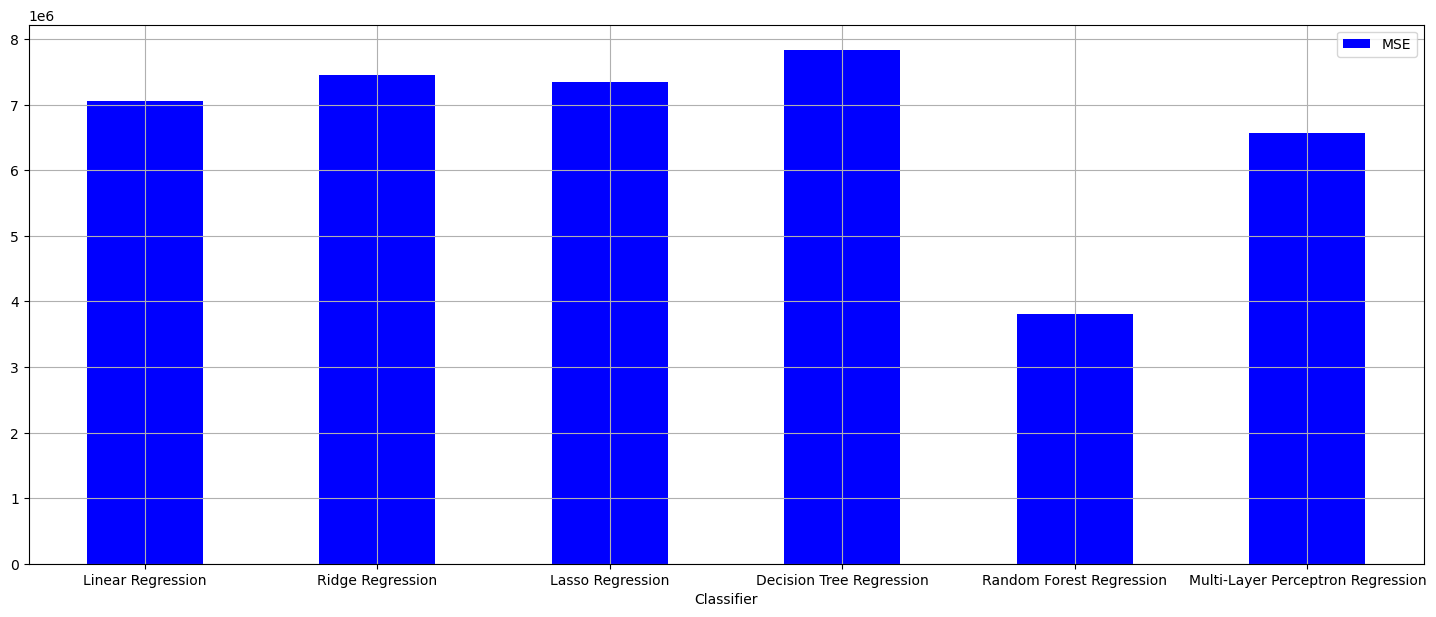

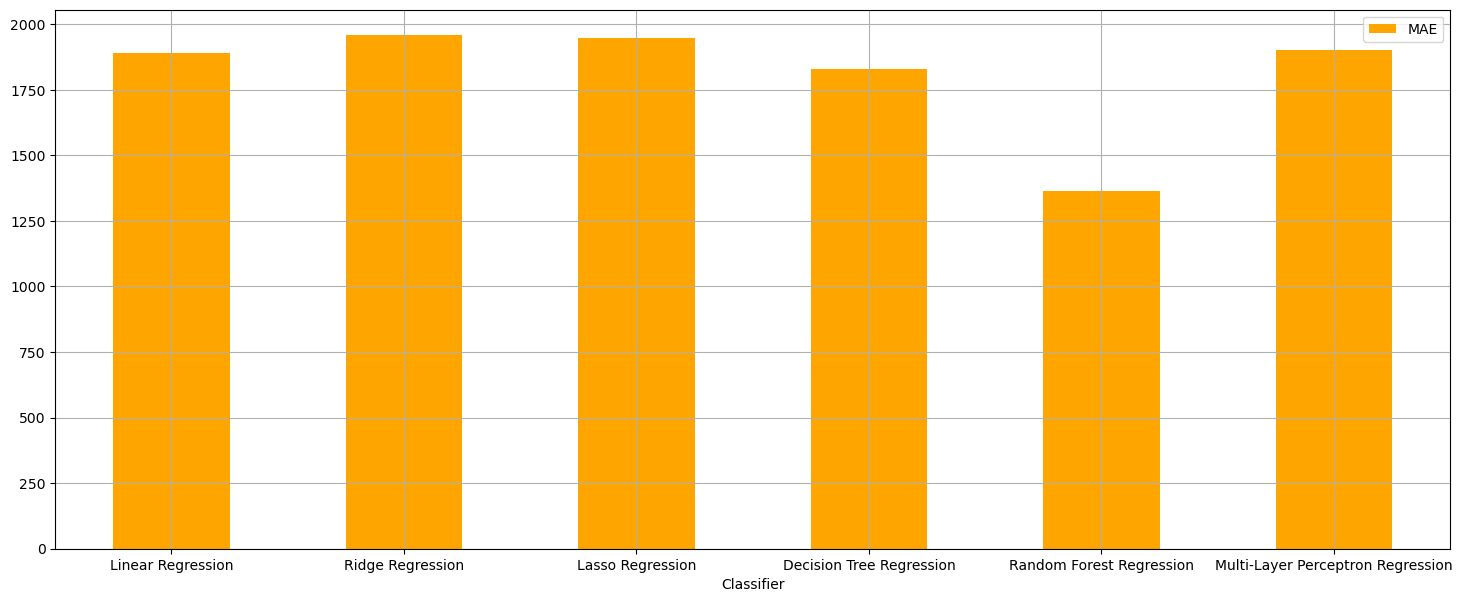

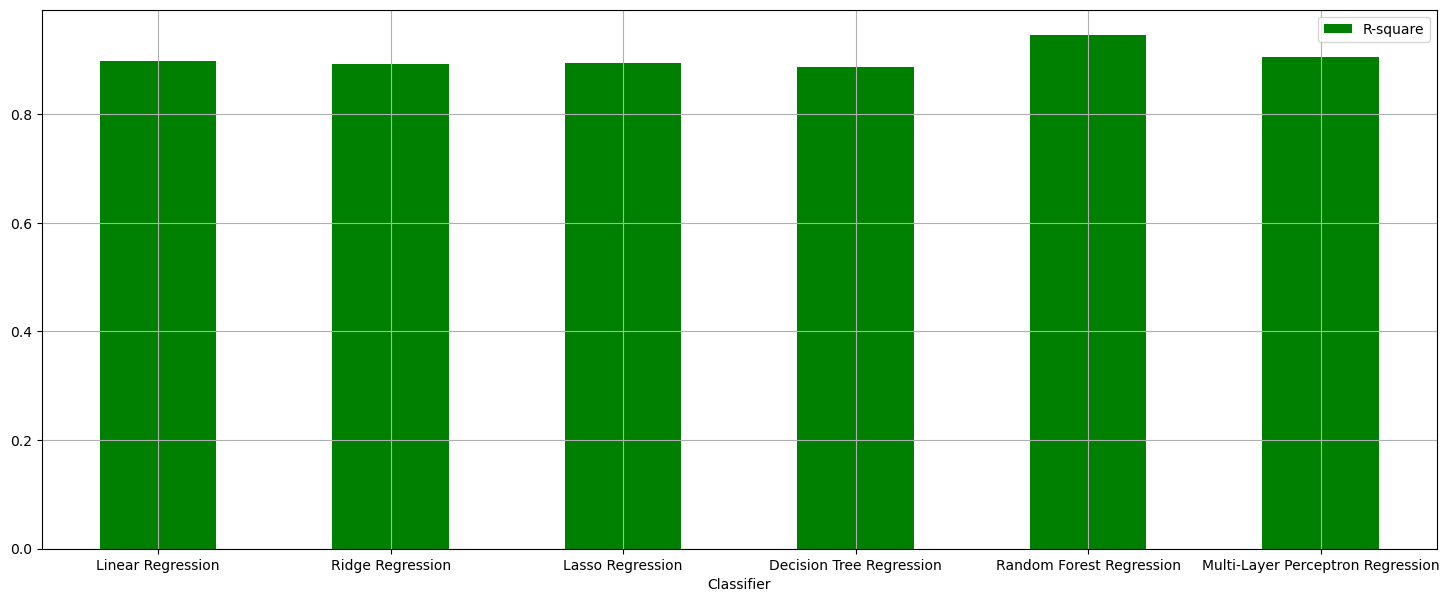

In [37]:
# create a list of metrics to loop through
metrics = ['MSE', 'MAE', 'R-square']

# loop through the metrics
for metric in metrics:
  # create a dataframe from the scores dictionary
  df = pd.DataFrame({'Classifier': list(scores.keys()), metric: [scores[name][metric] for name in scores]})

  # create a bar plot
  fig, ax = plt.subplots(figsize=(18,7))
  ax = df.plot.bar(x='Classifier', y=metric, rot=0, color = ["blue", "orange", "green"][metrics.index(metric)], grid = True, ax=ax)


# Task 5: Dimensionality Reduction

In this task you will study the effect of dimensionality reduction in the performance of our regression models. More specifically, you will create a **new target space with 8 dimensions** by applying the following two techniques **on the standardized data**.

* Principle Component Analysis (PCA) with 8 target variables.
* Manually keep the best 8 features that derived from task 2.5. These are the 8 features that achieved the highest Pearson coefficient values with the target variable.

Compare the performance of the models on the reduced dimensional space against the original dimensional space. Discuss the results.


# Applying PCA on the standrdized data

In [38]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

In [39]:
# fit the PCA model to the training data and transform it to the new subspace
pca = PCA(n_components = 8)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Running the models again, with modified data

In [40]:
# create a dictionary to store the evaluation metric scores for each model
scores = {}

# loop through the models
for name, model in models.items():
  # fit the model to the training data
  model.fit(X_train_pca, Y_train)
  
  # make predictions on the test data
  predictions = model.predict(X_test_pca)
  
  # compute the MSE, MAE, and R-square scores for the model
  scores[name] = {'MSE': mean_squared_error(Y_test, predictions),
                  'MAE': mean_absolute_error(Y_test, predictions),
                  'R-square': model.score(X_test_pca, Y_test)}

# create a dictionary for the dataframe
dat = {
    "Classifier": ["Linear Regression", "Ridge Regression","Lasso Regression", "Decision Tree", "Random Forest","Multilayer Perceptron Regressor"],
    "MSE": [scores[name]["MSE"] for name in scores],
    "MAE": [scores[name]["MAE"] for name in scores],
    "R2": [scores[name]["R-square"] for name in scores]
}

# create a dataframe from the dictionary
df = pd.DataFrame.from_dict(dat)

# print the dataframe
df

c:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Classifier,MSE,MAE,R2
0,Linear Regression,1.399933e+07,2576.786323,0.797944
1,Ridge Regression,1.399889e+07,2576.765958,0.797950
2,Lasso Regression,1.399798e+07,2576.723025,0.797963
3,Decision Tree,1.280851e+07,2367.493277,0.815131
4,Random Forest,9.021739e+06,1904.463695,0.869787
5,Multilayer Perceptron Regressor,1.144460e+07,2497.226101,0.834817


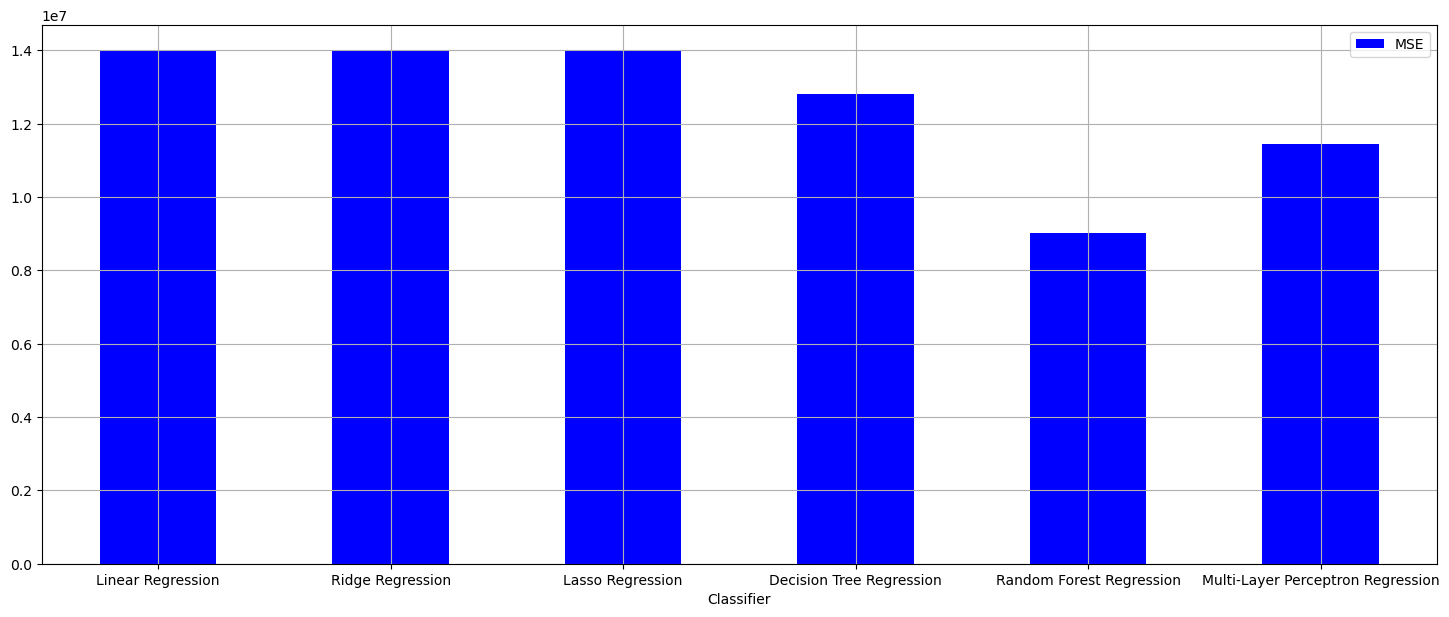

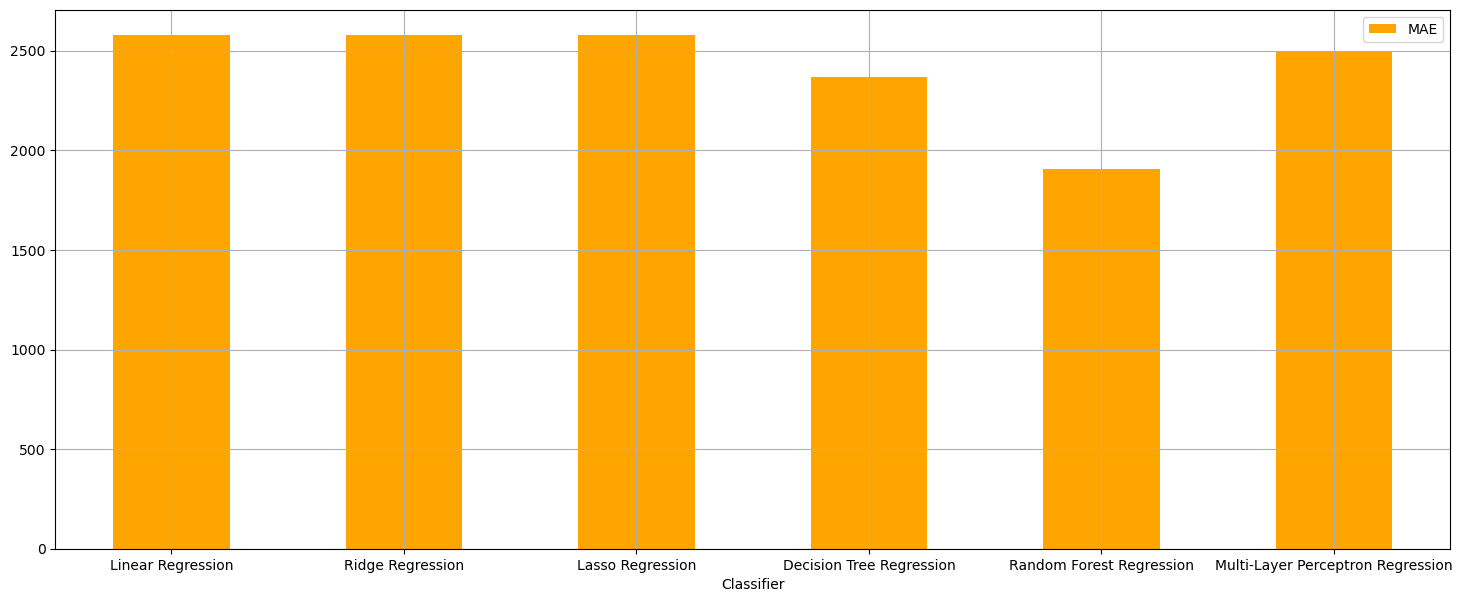

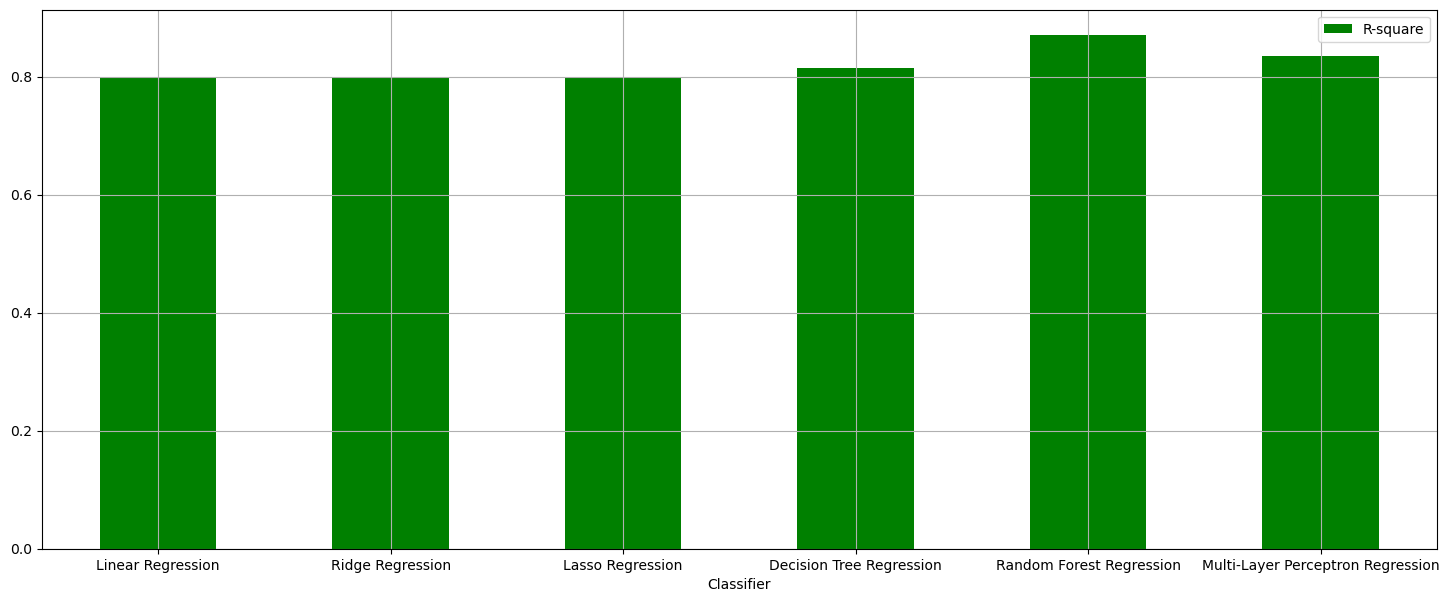

In [41]:
# create a list of metrics to loop through
metrics = ['MSE', 'MAE', 'R-square']

# loop through the metrics
for metric in metrics:
  # create a dataframe from the scores dictionary
  df = pd.DataFrame({'Classifier': list(scores.keys()), metric: [scores[name][metric] for name in scores]})

  # create a bar plot
  fig, ax = plt.subplots(figsize=(18,7))
  ax = df.plot.bar(x='Classifier', y=metric, rot=0, color = ["blue", "orange", "green"][metrics.index(metric)], grid = True, ax=ax)


# Keeping manually the 8 higher scorers in Pearson coefficient

In [42]:
# On train set, we select the 8 higher scorers in Pearson's coefficient
X_train_std_8 = pd.DataFrame(X_train_std_.loc[:,['enginesize','curbweight','horsepower','carwidth','carlength','drivewheel_rwd','wheelbase','boreratio']])

X_train_std_8

,enginesize,curbweight,horsepower,carwidth,carlength,drivewheel_rwd,wheelbase,boreratio
0,-0.121429,-0.221382,-0.340756,0.235105,0.076413,-0.790569,0.573309,-0.038909
1,0.314497,0.646950,1.723785,0.924984,0.302880,1.264911,0.622875,1.692945
2,-0.412047,-0.179118,-0.813362,0.235105,0.076413,-0.790569,0.573309,-0.186301
3,-0.847973,-1.448956,-0.738740,-0.960684,-2.430901,-0.790569,-2.037199,-1.512828
4,0.895732,0.262732,0.380589,-0.546757,0.173470,1.264911,0.375042,-0.038909
...,...,...,...,...,...,...,...,...
138,1.307440,1.086878,1.350675,0.878992,0.310968,1.264911,0.044598,0.403266
139,0.895732,0.925507,0.380589,0.419073,1.160219,1.264911,0.755053,-0.038909
140,-0.726882,-1.220347,-0.912858,-1.006675,-0.756662,-0.790569,-0.731945,-0.628477
141,1.065259,0.850585,1.375549,0.787008,0.715373,1.264911,0.655920,-0.186301


In [43]:
# On test set, we select the 8 higher scorers in Pearson's coefficient
X_test_std_8 = pd.DataFrame(X_test_std_.loc[:,['enginesize','curbweight','horsepower','carwidth','carlength','drivewheel_rwd','wheelbase','boreratio']])

X_test_std_8

,enginesize,curbweight,horsepower,carwidth,carlength,drivewheel_rwd,wheelbase,boreratio
0,1.985547,1.261697,1.897903,0.419073,1.160219,1.264911,0.755053,1.103378
1,0.096534,0.921665,1.350675,0.878992,0.286704,-0.790569,0.094165,-0.702173
2,-0.169866,-0.521071,-0.216386,-0.362789,-0.101526,-0.790569,-0.285846,0.034787
3,-0.145647,0.162836,0.106976,0.235105,0.966105,-0.790569,0.028076,0.808594
4,1.355876,2.260663,0.430337,1.982797,1.313893,1.264911,1.828996,0.955986
...,...,...,...,...,...,...,...,...
57,-1.380772,-0.371227,-0.116890,-0.132830,-0.457402,1.264911,-0.599767,0.034787
58,1.622276,0.435630,2.519752,-0.454773,-0.465490,1.264911,-1.558055,1.545553
59,-0.847973,-1.258769,-0.937732,-0.730724,-1.403711,-0.790569,-0.864123,-1.291740
60,-0.460483,-0.361621,-0.589496,-0.270805,-0.214759,-0.790569,-0.318890,1.103378


In [44]:
X_train_std_8 = PCA().fit_transform(X_train_std_8)

In [45]:
X_test_std_8 = PCA().fit_transform(X_test_std_8)

In [46]:
# create a dictionary to store the evaluation metric scores for each model
scores = {}

# loop through the models
for name, model in models.items():
  # fit the model to the training data
  model.fit(X_train_std_8, Y_train)
  
  # make predictions on the test data
  predictions = model.predict(X_test_std_8)
  
  # compute the MSE, MAE, and R-square scores for the model
  scores[name] = {'MSE': mean_squared_error(Y_test, predictions),
                  'MAE': mean_absolute_error(Y_test, predictions),
                  'R-square': model.score(X_test_std_8, Y_test)}

# create a dictionary for the dataframe
dat = {
    "Classifier": ["Linear Regression", "Ridge Regression","Lasso Regression", "Decision Tree", "Random Forest","Multilayer Perceptron Regressor"],
    "MSE": [scores[name]["MSE"] for name in scores],
    "MAE": [scores[name]["MAE"] for name in scores],
    "R2": [scores[name]["R-square"] for name in scores]
}

# create a dataframe from the dictionary
df = pd.DataFrame.from_dict(dat)

# print the dataframe
df

c:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Classifier,MSE,MAE,R2
0,Linear Regression,2.403440e+07,3720.703883,0.653105
1,Ridge Regression,2.393202e+07,3708.625354,0.654583
2,Lasso Regression,2.392316e+07,3706.518230,0.654711
3,Decision Tree,3.046931e+07,3772.350321,0.560228
4,Random Forest,1.768448e+07,2769.626559,0.744755
5,Multilayer Perceptron Regressor,1.971074e+07,3206.905561,0.715510


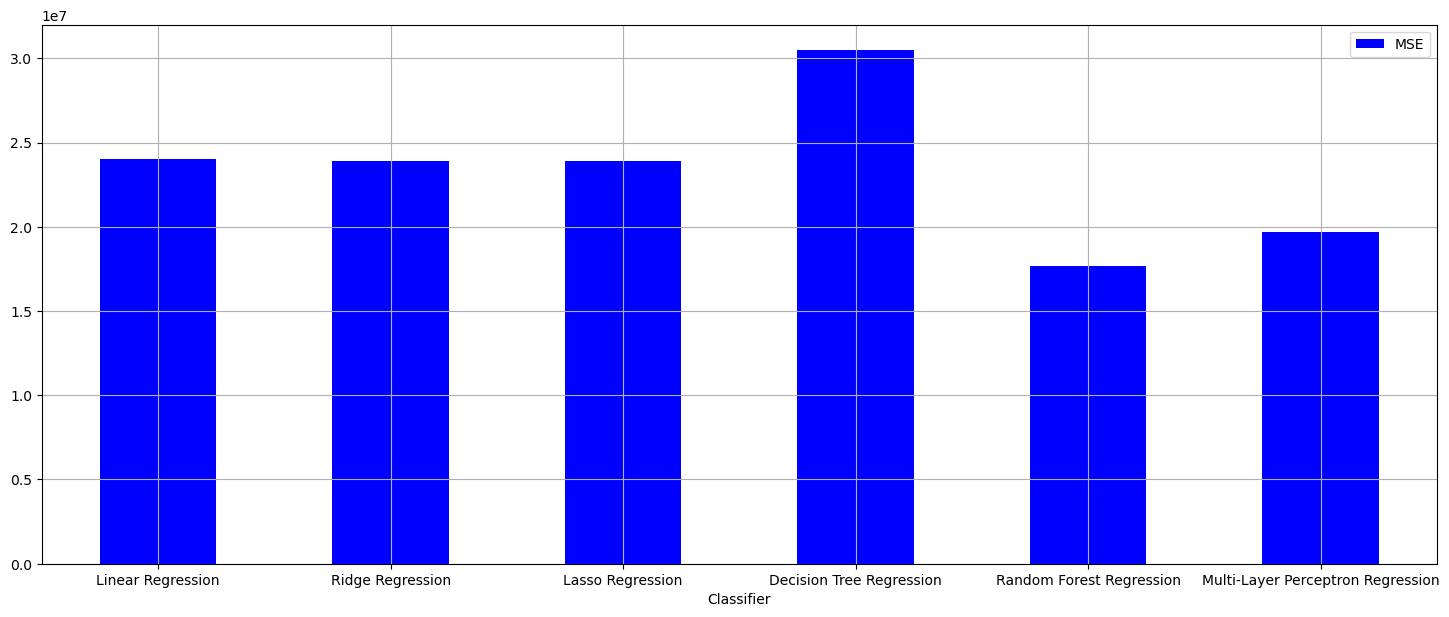

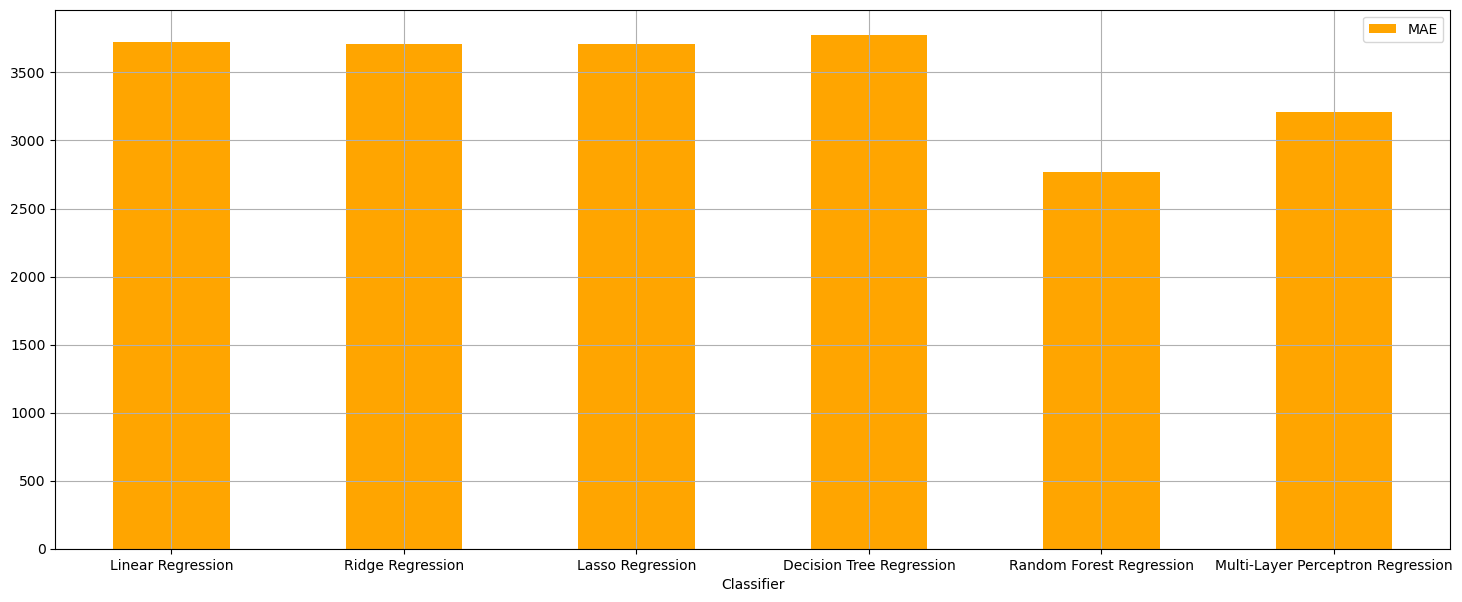

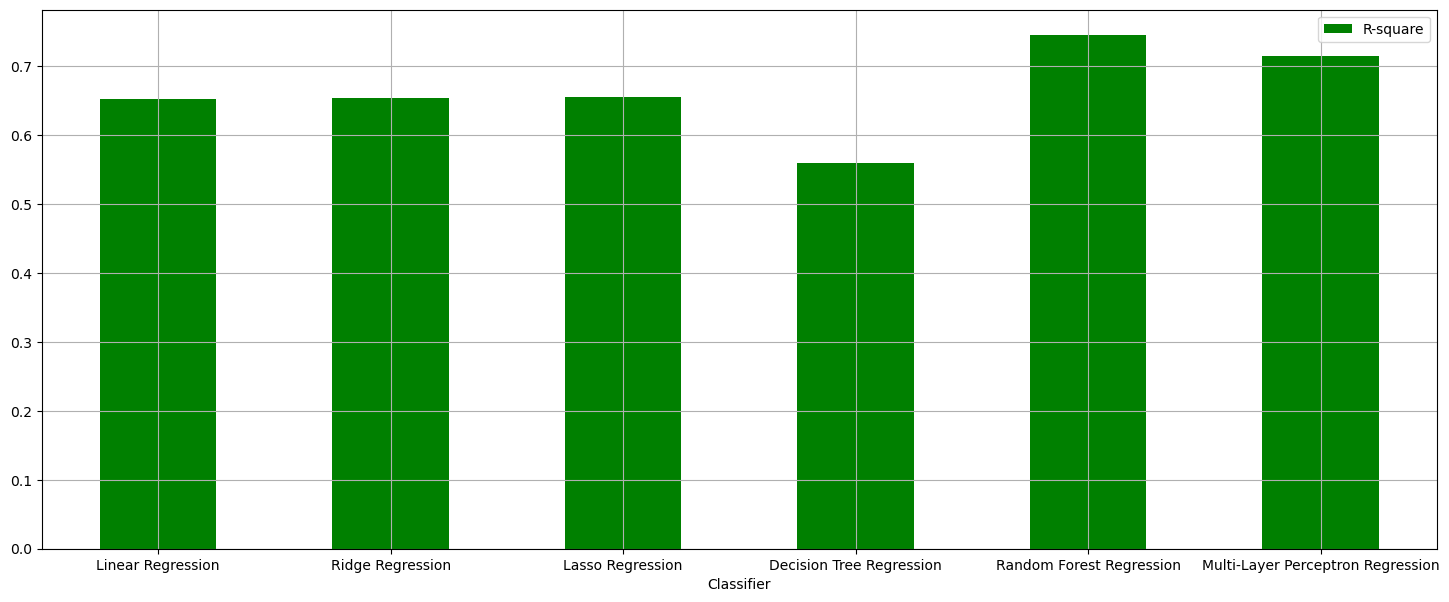

In [47]:
# create a list of metrics to loop through
metrics = ['MSE', 'MAE', 'R-square']

# loop through the metrics
for metric in metrics:
  # create a dataframe from the scores dictionary
  df = pd.DataFrame({'Classifier': list(scores.keys()), metric: [scores[name][metric] for name in scores]})

  # create a bar plot
  fig, ax = plt.subplots(figsize=(18,7))
  ax = df.plot.bar(x='Classifier', y=metric, rot=0, color = ["blue", "orange", "green"][metrics.index(metric)], grid = True, ax=ax)
